## Data Image Degerator API from Tensorflow

Link -> https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [50]:
!pip install ipython

In [51]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
!pip install split-folders

In [53]:
!split_folders --output '/content/drive/MyDrive/Colab Notebooks/splitted_potato_dataset' --ratio .7 .1 .2 -- '/content/drive/MyDrive/Colab Notebooks/Dataset_potato'

Copying files: 2152 files [00:29, 72.97 files/s]


In [54]:
IMAGE_SIZE=256
CHANNELS=3

train_datagen=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,
                                 rotation_range=10)

train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/splitted_potato_dataset/train',
                                                  target_size=(IMAGE_SIZE,IMAGE_SIZE), 
                                                  batch_size=32,class_mode='sparse',)
                                                  # save_to_dir='/content/drive/MyDrive/Colab Notebooks/AugmentedImages')

Found 1506 images belonging to 3 classes.


In [55]:
for image_batch, label_batch in train_generator:
  print(image_batch.shape)
  print(image_batch[0])
  break

(32, 256, 256, 3)
[[[0.7294118  0.7176471  0.7607844 ]
  [0.72981465 0.71804994 0.7611872 ]
  [0.7374507  0.725686   0.76882327]
  ...
  [0.5884365  0.5649071  0.6119659 ]
  [0.5882439  0.5647145  0.6117733 ]
  [0.5884536  0.5649242  0.61198306]]

 [[0.7294118  0.7176471  0.7607844 ]
  [0.7294118  0.7176471  0.7607844 ]
  [0.7372272  0.7254625  0.76859975]
  ...
  [0.5919501  0.5684207  0.6154795 ]
  [0.59215397 0.56862456 0.6156834 ]
  [0.5919442  0.5684148  0.6154736 ]]

 [[0.7294118  0.7176471  0.7607844 ]
  [0.7294118  0.7176471  0.7607844 ]
  [0.7368077  0.725043   0.76818025]
  ...
  [0.5884477  0.5649183  0.6119771 ]
  [0.588238   0.5647086  0.6117674 ]
  [0.5886494  0.56512    0.6121788 ]]

 ...

 [[0.73747855 0.7296354  0.7845374 ]
  [0.7376883  0.72984517 0.7847471 ]
  [0.737898   0.73005486 0.7849568 ]
  ...
  [0.6191067  0.60342044 0.6583224 ]
  [0.59419984 0.57851356 0.6334155 ]
  [0.5830726  0.5673863  0.6222883 ]]

 [[0.7403045  0.7324614  0.78736335]
  [0.73946565 0.731

In [56]:
validation_datagen=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,
                                 rotation_range=10)

validation_generator=validation_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/splitted_potato_dataset/val',
                                                  target_size=(IMAGE_SIZE,IMAGE_SIZE), 
                                                  batch_size=32,class_mode='sparse',)

Found 215 images belonging to 3 classes.


In [57]:
test_datagen=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,
                                 rotation_range=10)

test_generator=test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/splitted_potato_dataset/test',
                                                  target_size=(IMAGE_SIZE,IMAGE_SIZE), 
                                                  batch_size=32,class_mode='sparse',)

Found 431 images belonging to 3 classes.


In [58]:
input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=3

cnn= models.Sequential([
                          layers.InputLayer(input_shape=input_shape),
                          layers.Conv2D(32,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(n_classes, activation='softmax'),

])


In [59]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)      

In [60]:
cnn.compile(optimizer='adam', 
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
            metrics=['accuracy']
)

In [61]:
1506/32

47.0625

In [62]:
215/32

6.71875

In [63]:
history=cnn.fit(train_generator,
        steps_per_epoch=47, 
        batch_size=32, 
        validation_data=validation_generator, 
        validation_steps=6, 
        verbose=1, 
        epochs=5)

Epoch 1/5
47/47 [==============================] - 219s 5s/step - loss: 0.9153 - accuracy: 0.5109 - val_loss: 0.9052 - val_accuracy: 0.4531
Epoch 2/5
47/47 [==============================] - 201s 4s/step - loss: 0.8629 - accuracy: 0.5529 - val_loss: 0.6930 - val_accuracy: 0.6667
Epoch 3/5
47/47 [==============================] - 200s 4s/step - loss: 0.5683 - accuracy: 0.7646 - val_loss: 0.4509 - val_accuracy: 0.8333
Epoch 4/5
47/47 [==============================] - 200s 4s/step - loss: 0.3428 - accuracy: 0.8643 - val_loss: 0.3431 - val_accuracy: 0.8385
Epoch 5/5
47/47 [==============================] - 199s 4s/step - loss: 0.3285 - accuracy: 0.8684 - val_loss: 0.4094 - val_accuracy: 0.8490


In [64]:
scores = cnn.evaluate(test_generator)

14/14 [==============================] - 20s 1s/step - loss: 0.4846 - accuracy: 0.8515


In [65]:
scores

[0.4846160113811493, 0.8515081405639648]

### Histiry function of keras

Link -> https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [67]:
history

In [68]:
history.params

{'epochs': 5, 'steps': 47, 'verbose': 1}

In [69]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [70]:
type(history.history['loss'])

list

In [71]:
len(history.history['loss'])

5

In [72]:
history.history['loss'][:5]

[0.9153433442115784,
 0.862913966178894,
 0.5682860612869263,
 0.342795729637146,
 0.328512042760849]

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [74]:
val_acc

[0.453125,
 0.6666666865348816,
 0.8333333134651184,
 0.8385416865348816,
 0.8489583134651184]

In [75]:
acc

[0.5108548402786255,
 0.5529172420501709,
 0.7645861506462097,
 0.8643147945404053,
 0.868385374546051]

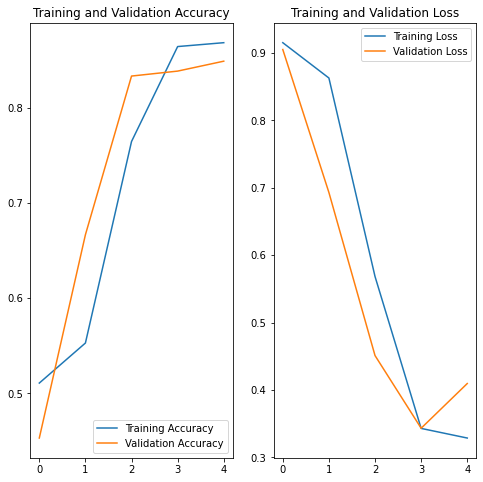

In [76]:
EPOCHS = 5

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Predicting on a sample Image

In [79]:
class_names=['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


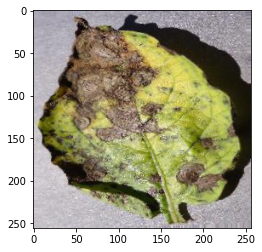

In [81]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = cnn.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

## Inference

In [82]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

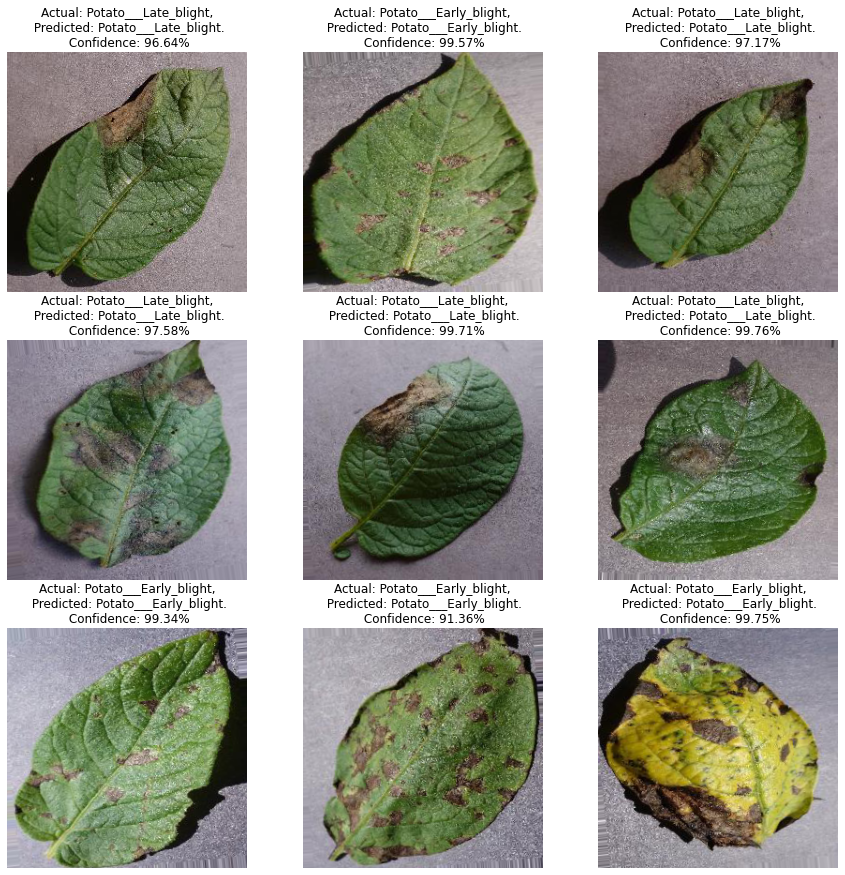

In [84]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(cnn, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

## Saving the model

In [85]:
cnn.save("/content/drive/MyDrive/Colab Notebooks/potatoes.h5")